In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
tt_data = pd.read_csv('/data/time_tracking.csv', parse_dates=[0], index_col=[0])

# sort everything by date
tt_data = tt_data.sort_index(0)

TOTAL_TIME = 'Total Time (1)'

In [3]:
by_complexity = tt_data.groupby('Complexity')[TOTAL_TIME]

In [7]:
by_complexity.describe()

,count,mean,std,min,25%,50%,75%,max
Complexity,,,,,,,,
Basic,1616.0,2.522896,1.908919,0.3,2.000,2.0,3.000,21.0
Complex,4420.0,17.592670,6.780634,0.3,15.000,19.0,20.500,67.0
Easy,8073.0,5.401251,1.981074,0.1,4.500,5.0,6.500,45.0
Medium,9398.0,9.851979,3.664939,0.3,8.000,10.0,12.000,70.0
NotSpecified,2509.0,3.062455,13.032583,0.1,1.000,1.5,3.000,327.5
Special,74.0,49.577027,43.510133,1.0,24.375,37.5,49.375,172.0


## Packaging time Statistics

- The red lines are the packaging times of individual packages over time.
- The blue lines are the planned packaging times for packages of a certain category.
- The green lines are the averages of the actual packaging times by category.

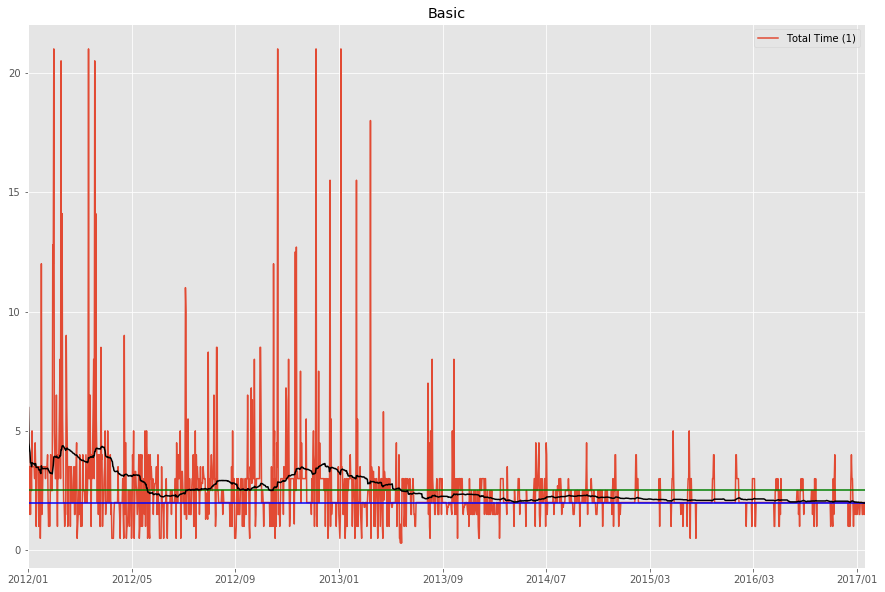

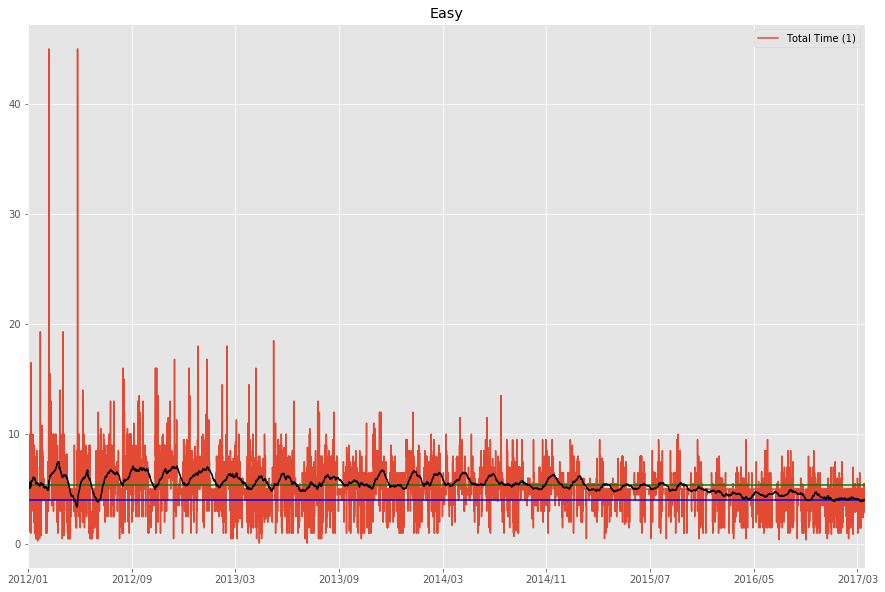

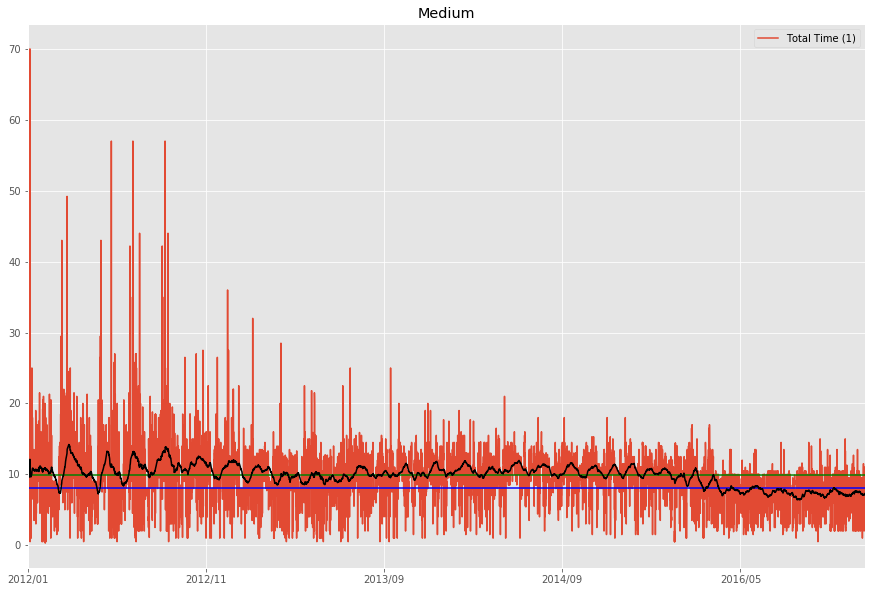

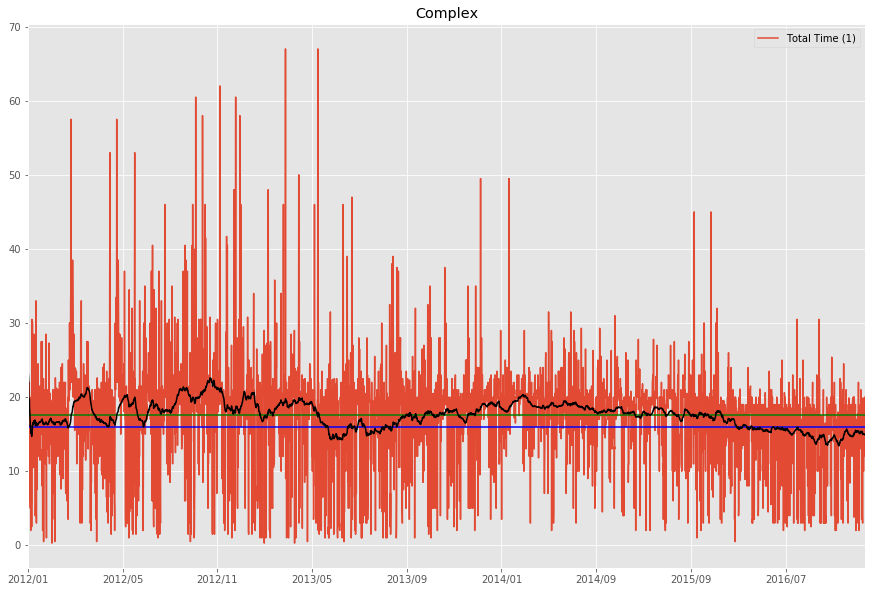

In [50]:
planned_times = {
    "Basic": 2,
    "Easy": 4,
    "Medium": 8,
    "Complex": 16
}

for complexity_type in ['Basic', 'Easy', 'Medium', 'Complex']:
    this_complexity = tt_data[tt_data['Complexity'] == complexity_type]
    index = np.arange(this_complexity[TOTAL_TIME].count())
    ax = this_complexity.plot(
        x=index,
        y=TOTAL_TIME,
        title=complexity_type,
        # This controls the size of the figure
        figsize=(15, 10),
    )
    ax.set_xticklabels(this_complexity.index[ax.get_xticks()[:-1].astype('int')].strftime("%Y/%m"))
    
    # Data Mean
    plt.axhline(y=this_complexity[TOTAL_TIME].mean(), color='green')
    
    # Planned packaging times
#     if complexity_type is not "NotSpecified":
    plt.axhline(y=planned_times[complexity_type], color='blue')
    
    # Running Average
    new = pd.DataFrame(data={TOTAL_TIME: this_complexity[TOTAL_TIME].values})
    plt.plot(new.rolling(100, min_periods=1).mean(), color='black')
    plt.show()

## Selecting outliers

In [53]:
def select_outliers(df, complexity_type, value):
    this_complexity = df[df['Complexity'] == complexity_type]
    cutoff = this_complexity[TOTAL_TIME].std() + value
    return this_complexity[this_complexity[TOTAL_TIME] > cutoff]
    

In [55]:
len(select_outliers(tt_data, 'Easy', planned_times['Easy']))

2715

### WIP: Nicer Date indices

It might be potentially useful to have the x-axis labels be evenly spaced in terms of dates, not in terms of packages, as they are right now.
This is definitely quite a bit more advanced, so will require a bit of time before it's implemented.

In [37]:
index[this_complexity.index.get_loc('2017/01')][0]

2450